# **PROYECTO FINAL**

# **1. Descripción.**

Se utilizara una metodologia de aprendizaje supervisado siguiendo los siguientes pasos:

**i) Comprensión del Problema:** Entender el objetivo y requisitos del proyecto

**ii)Recopilación de Datos:** Obtener el conjunto de datos necesario.

**iii)Exploración y Preparación de Datos:** Limpiar y explorar los datos.


#**I. Comprension del Problema**

Los datos están relacionados con campañas de marketing directo de una institución bancaria portuguesa.


Las campañas de marketing se basaron en llamadas telefónicas (telefono, celular).

🔹 Objetivo: Predecir si un cliente aceptara un producto (tarjeta, préstamo).

#**II. Recopilacion de Datos**

In [1]:
import pandas as pd

In [ ]:
# leer datasets
train_set = pd.read_csv('/content/bank-additional-full.csv',sep=';')
test_set = pd.read_csv('/content/bank-additional.csv',sep=';')

In [3]:
# ver registros nulos
def validarNulos(df):
  valoresNulos = df.isnull().sum()
  porcentajeNulos = ( valoresNulos /len(df)) *100
  dfNulos = pd.DataFrame({'Valores Nulos' : valoresNulos, 'Procentaje Nulos': porcentajeNulos})

  display(dfNulos)

In [4]:
validarNulos(train_set)

Valores Nulos  Procentaje Nulos
age                         0               0.0
job                         0               0.0
marital                     0               0.0
education                   0               0.0
default                     0               0.0
housing                     0               0.0
loan                        0               0.0
contact                     0               0.0
month                       0               0.0
day_of_week                 0               0.0
duration                    0               0.0
campaign                    0               0.0
pdays                       0               0.0
previous                    0               0.0
poutcome                    0               0.0
emp.var.rate                0               0.0
cons.price.idx              0               0.0
cons.conf.idx               0               0.0
euribor3m                   0               0.0
nr.employed                 0               0.0
y                           0               0.0

In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
train_set.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [7]:
#columnas categoricas
col_categoricas = list(train_set.select_dtypes(include='object').columns)
#columnas numericas
col_numericas = list(train_set.select_dtypes(exclude='object').columns)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-9-5a0670a4048b>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[idx].legend(title='Subscribió?', loc='upper right')


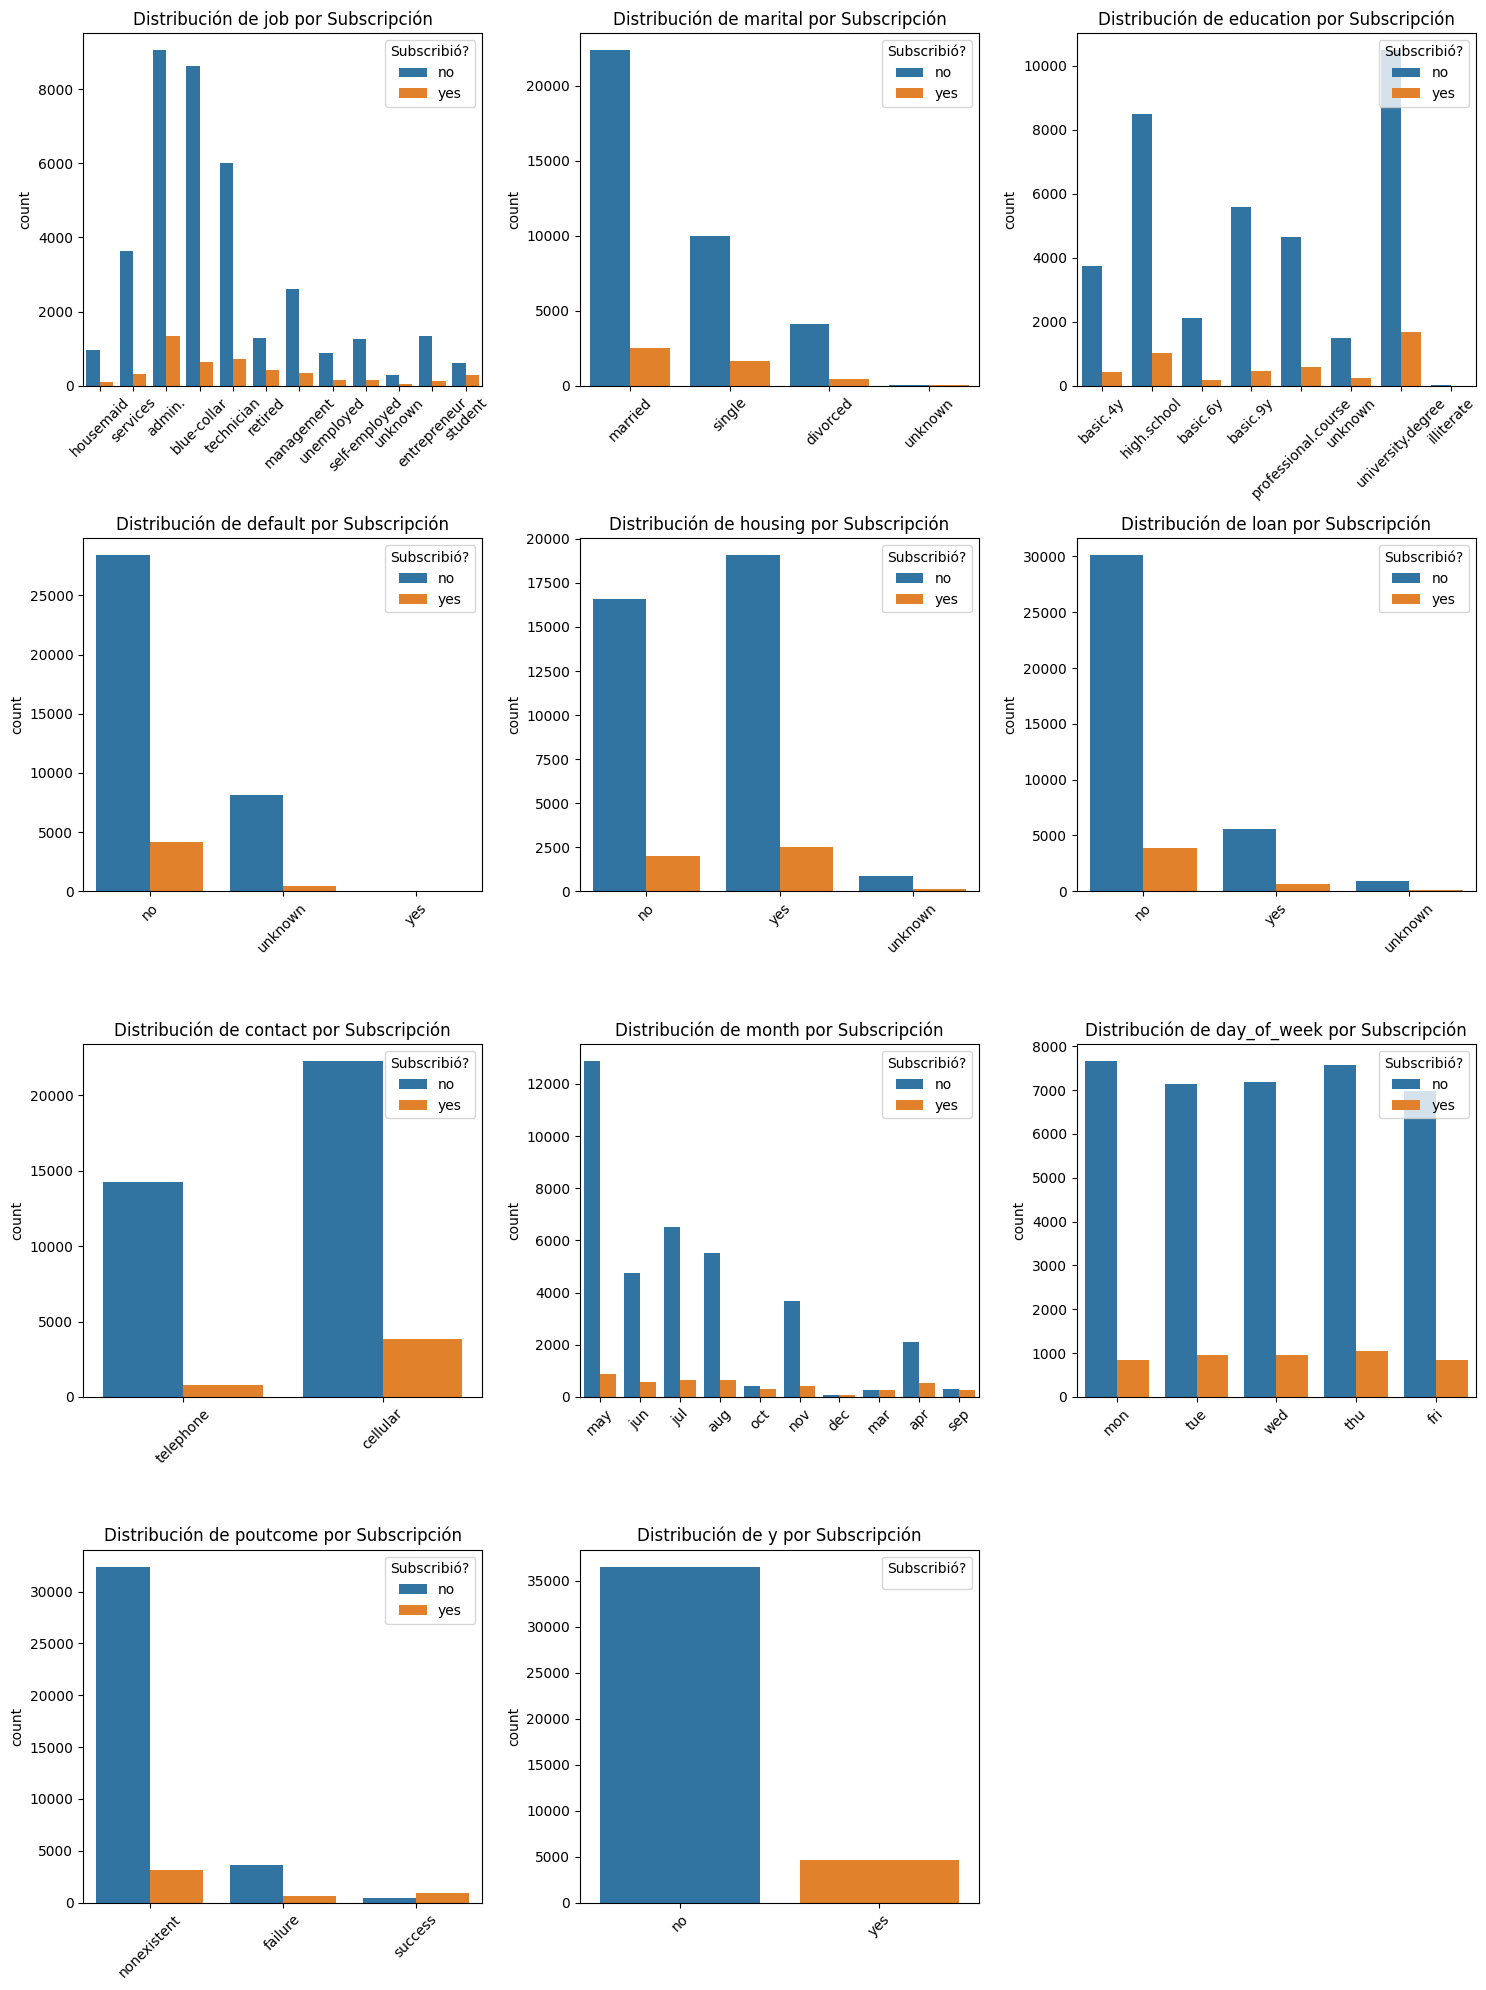

In [9]:
fig,axes = plt.subplots(4,3,figsize=(15,20))
axes = axes.flatten()
for idx,col_cat in enumerate(col_categoricas):
  if idx < len(axes):
    sns.countplot(x=col_cat, data=train_set, hue='y', ax=axes[idx] )
    axes[idx].set_title(f'Distribución de {col_cat} por Subscripción')
    axes[idx].set_xlabel('')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].legend(title='Subscribió?', loc='upper right')

for idx in range(len(col_categoricas), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

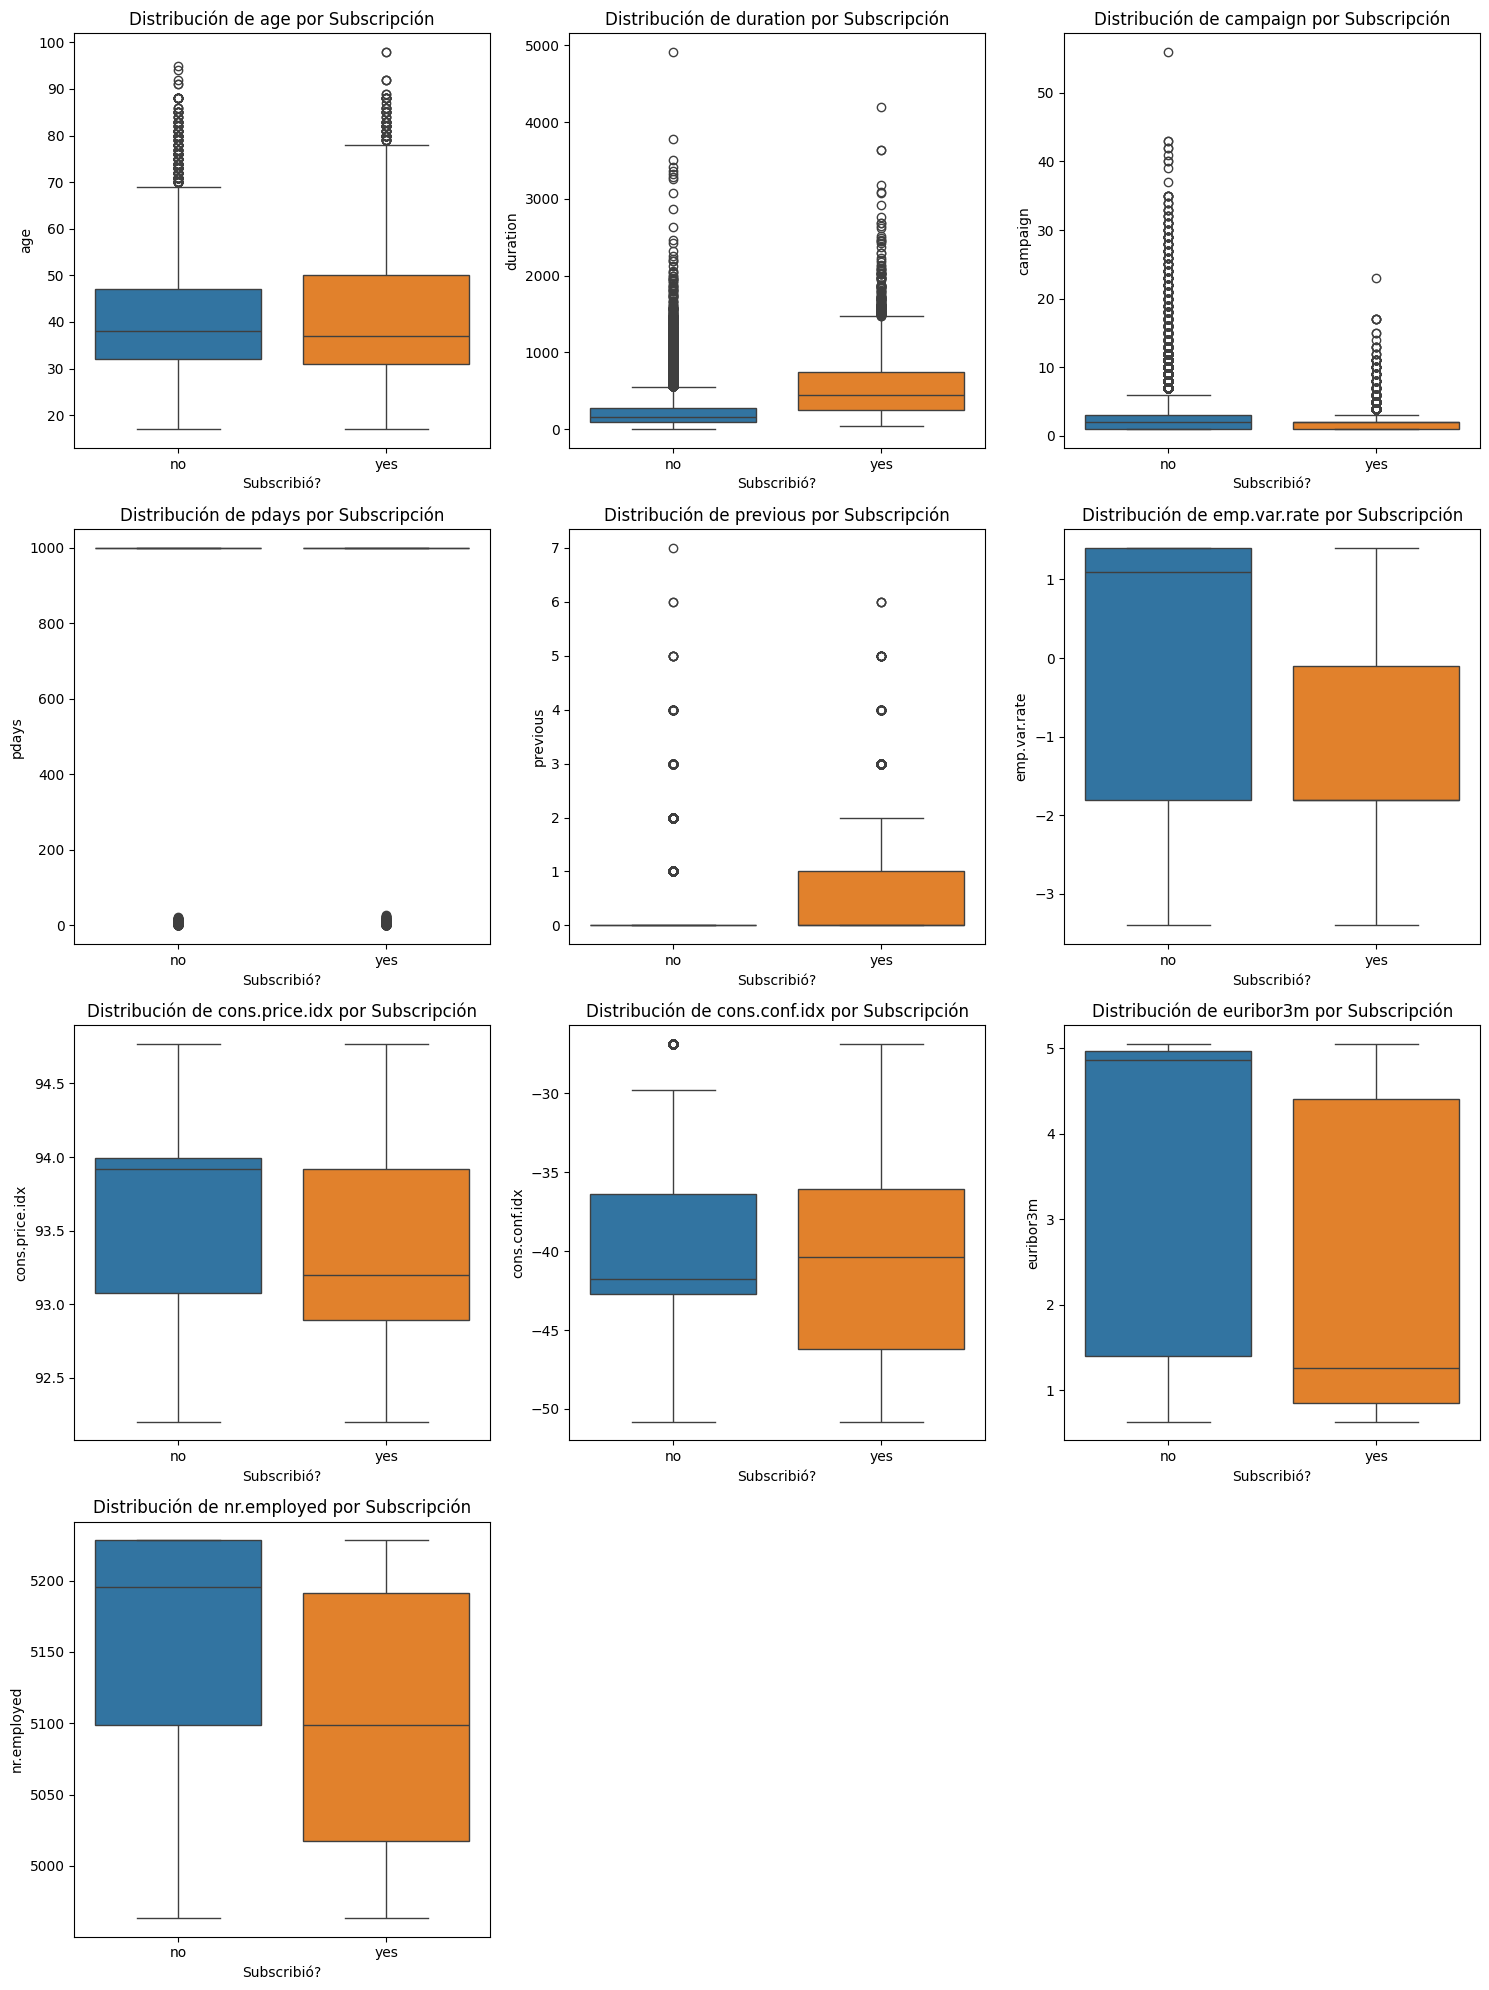

In [10]:
fig_num, axes_num = plt.subplots(4, 3, figsize=(15,20))
axes_num = axes_num.flatten()

for idx, col_num in enumerate(col_numericas):
    sns.boxplot(x='y',hue="y", y=col_num, data=train_set, ax=axes_num[idx])
    axes_num[idx].set_title(f'Distribución de {col_num} por Subscripción', fontsize=12)
    axes_num[idx].set_xlabel('Subscribió?', fontsize=10)
    axes_num[idx].set_ylabel(col_num, fontsize=10)

for idx in range(len(col_numericas), len(axes_num)):
    fig_num.delaxes(axes_num[idx])

plt.tight_layout()
plt.show()

In [11]:
cols_outlayers = ['age', 'duration', 'campaign','previous']
for col in cols_outlayers:
    Q1 = train_set[col].quantile(0.25)
    Q3 = train_set[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = train_set[(train_set[col] < (Q1 - 1.5 * IQR)) | (train_set[col] > (Q3 + 1.5 * IQR))]
    print(f"Outliers en {col}: {len(outliers)} ({len(outliers)/len(train_set)*100:.2f}%), valor superior: {Q3 + 1.5 * IQR}")

Outliers en age: 469 (1.14%), valor superior: 69.5
Outliers en duration: 2963 (7.19%), valor superior: 644.5
Outliers en campaign: 2406 (5.84%), valor superior: 6.0
Outliers en previous: 5625 (13.66%), valor superior: 0.0


In [12]:
def normalize_month(df):
  lst_mes = {"ene": 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct':10, 'nov':11, 'dec':12}
  df["month"] = df["month"].map(lst_mes).astype(type(1))

In [13]:
def normalize_days(df):
  lst_days = {"mon": 1, "tue": 2, "wed": 3, "thu": 4, "fri": 5, "sat": 6, "sun": 7}
  df["day_of_week"] = df["day_of_week"].map(lst_days).astype(type(1))

In [14]:
def group_education(df):
  df["education"] = df["education"].replace(regex=[r'^basic.*$', 'illiterate', "unknown"], value='educacion_baja') \
                    .replace(regex=["high.school"], value='educacion_media') \
                    .replace(regex=['university.degree', 'professional.course'], value='educacion_alta')

In [15]:
def group_job(df):
  df["job"] = df["job"].replace(to_replace =["entrepreneur","blue-collar","self-employed", "technician", "services"], value="salario_variable") \
                       .replace(to_replace =["retired","housemaid","admin.","management"], value="salario_fijo") \
                       .replace(to_replace =["unemployed","student","unknown"], value="sin_salario_fijo")

In [16]:
def agrupar_deuda(df):
  lst_deuda = ["housing", "loan"]
  procesar = set(lst_deuda) - set(df.columns)

  def cal_value(row):
    if 'yes' in [ row['housing'], row['loan']]:
      return 1
    elif 'unknown' in [row['housing'], row['loan']]:
      return 2
    else:
      return 0

  if len(procesar) == 0:
    df['deuda'] = df.apply(cal_value, axis=1)
    df.drop(["housing", "loan"], axis=1, inplace=True)



In [17]:
def convertir_categoricas_numericas(df,cols):
  df.drop("contact",axis=1, inplace=True)
  df = pd.get_dummies(df, columns=cols)

  cols_bool = list(df.select_dtypes(include='bool').columns)

  for colBool in cols_bool:
    df[colBool] = df[colBool].astype(int)
  return df

In [18]:
from sklearn.preprocessing import LabelEncoder
def label_enconding(df):
  label_encoder = LabelEncoder()

  for column in df.columns:
    if not pd.api.types.is_numeric_dtype(df[column]):
      df[column] = label_encoder.fit_transform(df[column].astype(str))

  return df

In [19]:
#Tratamiento de Datos Entrenamiento
normalize_month(train_set)
normalize_days(train_set)
group_education(train_set)
group_job(train_set)
agrupar_deuda(train_set)

cols_convertir = ["marital","job","education"]
train_set = convertir_categoricas_numericas(train_set,cols_convertir)
train_set = label_enconding(train_set)

In [20]:
train_set.columns

Index(['age', 'default', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'deuda',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'job_salario_fijo', 'job_salario_variable',
       'job_sin_salario_fijo', 'education_educacion_alta',
       'education_educacion_baja', 'education_educacion_media'],
      dtype='object')

In [21]:
train_set.head()

age  default  month  day_of_week  duration  campaign  pdays  previous  \
0   56        0      5            1       261         1    999         0   
1   57        1      5            1       149         1    999         0   
2   37        0      5            1       226         1    999         0   
3   40        0      5            1       151         1    999         0   
4   56        0      5            1       307         1    999         0   

   poutcome  emp.var.rate  ...  marital_divorced  marital_married  \
0         1           1.1  ...                 0                1   
1         1           1.1  ...                 0                1   
2         1           1.1  ...                 0                1   
3         1           1.1  ...                 0                1   
4         1           1.1  ...                 0                1   

   marital_single  marital_unknown  job_salario_fijo  job_salario_variable  \
0               0                0                 1                     0   
1               0                0                 0                     1   
2               0                0                 0                     1   
3               0                0                 1                     0   
4               0                0                 0                     1   

   job_sin_salario_fijo  education_educacion_alta  education_educacion_baja  \
0                     0                         0                         1   
1                     0                         0                         0   
2                     0                         0                         0   
3                     0                         0                         1   
4                     0                         0                         0   

   education_educacion_media  
0                          0  
1                          1  
2                          1  
3                          0  
4                          1  

[5 rows x 26 columns]

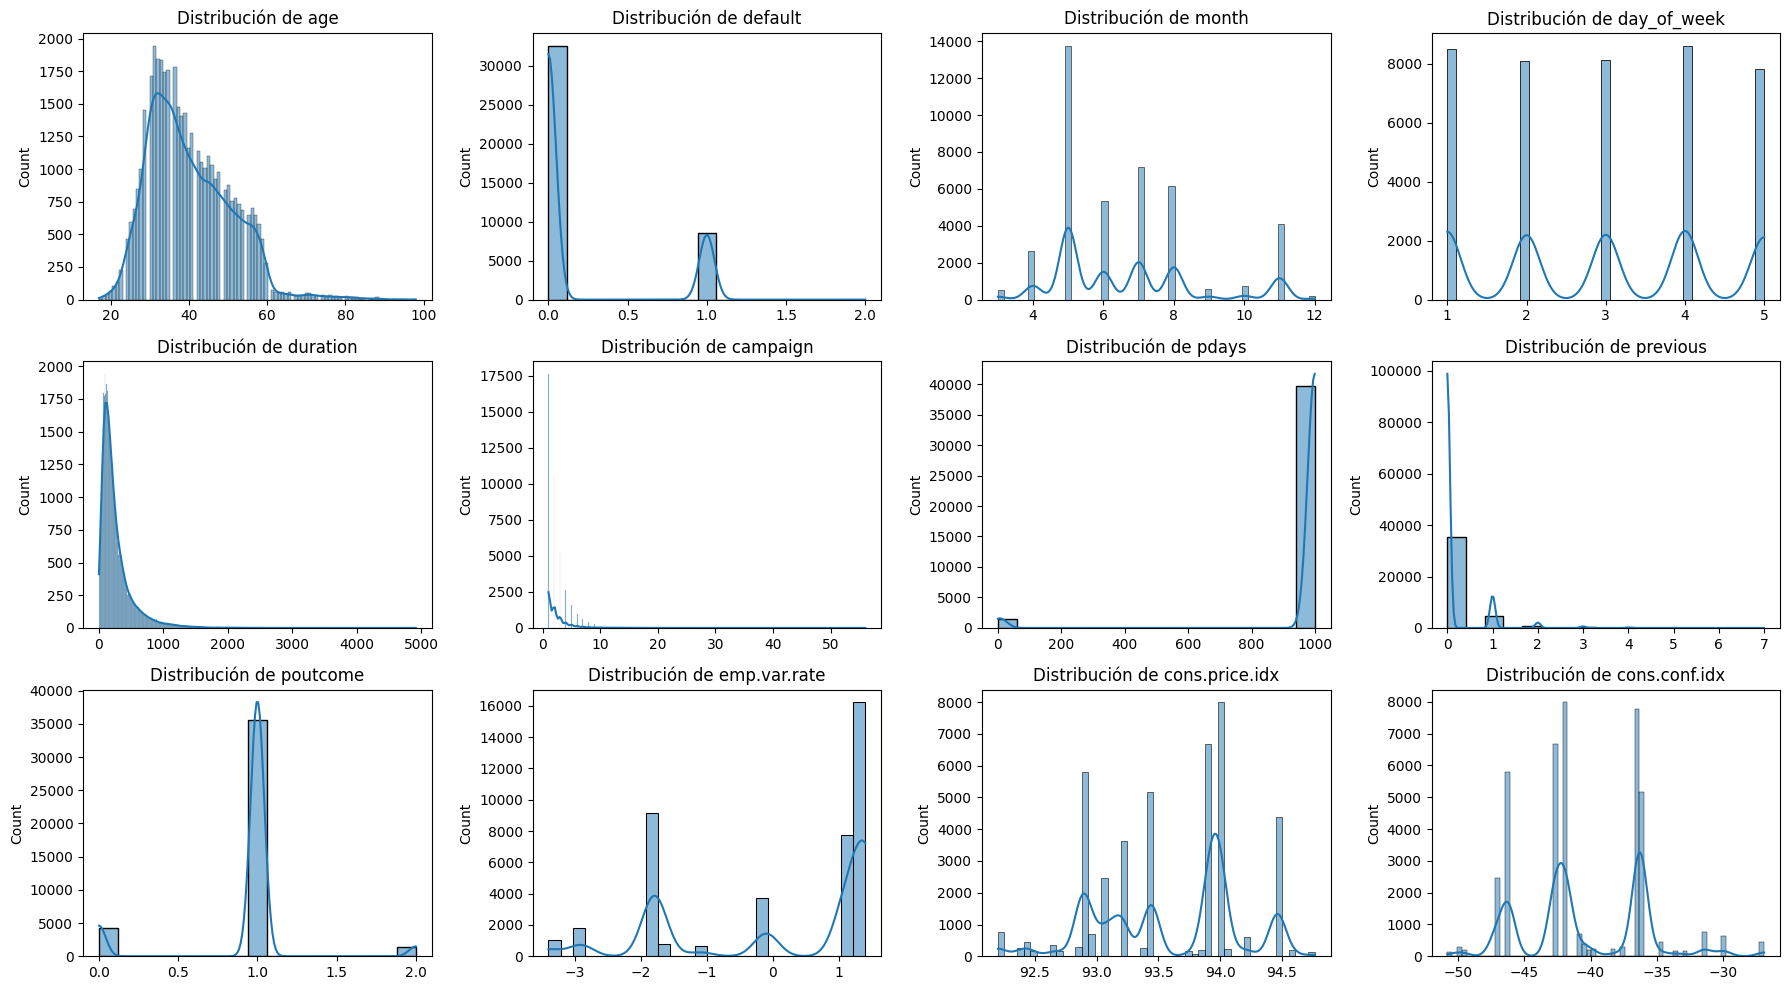

In [22]:
figure, axes = plt.subplots( 3 , 4, figsize=(18, 10))

for column, axe in zip(train_set, axes.flatten()):
    ax = sns.histplot(train_set[column], ax=axe, kde=True)
    ax.set_title(f'Distribución de {column}')
    ax.set_xlabel('')
plt.tight_layout()

In [23]:
def create_bins(df, column, bins_dict):
    bins_list = bins_dict.get("bins_list")
    bins_number = bins_dict.get("bins_number")

    if bins_list:
        data_for_bins = pd.cut(df[column], bins=bins_list, precision=0, duplicates="drop")
    else:
        data_for_bins = df[column].copy()

        min_value = data_for_bins.min()
        max_value = data_for_bins.max()

        temp_values = data_for_bins.tolist()

        if len(data_for_bins[data_for_bins == min_value]) > 1:
            temp_values.append(min_value - 1)

        if len(data_for_bins[data_for_bins == max_value]) > 1:
            temp_values.append(max_value + 1)

        quantiles = pd.qcut(pd.Series(temp_values), q=bins_number, precision=0, duplicates="drop")

        if len(temp_values) > len(data_for_bins):
            quantiles = quantiles[:-1]

        data_for_bins = quantiles

    dictionary_of_intervals = {interval: idx for idx, interval in enumerate(data_for_bins.cat.categories)}

    bins_column = "Bins_for_" + column
    df[bins_column + "_index"] = data_for_bins.cat.rename_categories(dictionary_of_intervals)

    df[bins_column + "_index"] = df[bins_column + "_index"].astype('category')

    print(f"Bins for {column} creados")
    return df

In [24]:
bins_dict = {
    "age": {"bins_number": 0, "bins_list": [0,20,30,40,50,60,70,100]},
	  "duration": {"bins_number": 5, "bins_list": []},
	  "campaign": {"bins_number": 4, "bins_list": []},
	  "emp.var.rate": {"bins_number": 5, "bins_list": []},
	  "cons.price.idx": {"bins_number": 5, "bins_list": []},
	  "cons.conf.idx": {"bins_number": 5, "bins_list": []},
	  "euribor3m": {"bins_number": 5, "bins_list": []}
}

In [25]:
for column, bins_list in bins_dict.items():
  create_bins(train_set, column, bins_list)

Bins for age creados
Bins for duration creados
Bins for campaign creados
Bins for emp.var.rate creados
Bins for cons.price.idx creados
Bins for cons.conf.idx creados
Bins for euribor3m creados


In [26]:
train_set.head()

age  default  month  day_of_week  duration  campaign  pdays  previous  \
0   56        0      5            1       261         1    999         0   
1   57        1      5            1       149         1    999         0   
2   37        0      5            1       226         1    999         0   
3   40        0      5            1       151         1    999         0   
4   56        0      5            1       307         1    999         0   

   poutcome  emp.var.rate  ...  education_educacion_alta  \
0         1           1.1  ...                         0   
1         1           1.1  ...                         0   
2         1           1.1  ...                         0   
3         1           1.1  ...                         0   
4         1           1.1  ...                         0   

   education_educacion_baja  education_educacion_media  Bins_for_age_index  \
0                         1                          0                   4   
1                         0                          1                   4   
2                         0                          1                   2   
3                         1                          0                   2   
4                         0                          1                   4   

   Bins_for_duration_index  Bins_for_campaign_index  \
0                        3                        0   
1                        2                        0   
2                        3                        0   
3                        2                        0   
4                        3                        0   

   Bins_for_emp.var.rate_index  Bins_for_cons.price.idx_index  \
0                            2                              3   
1                            2                              3   
2                            2                              3   
3                            2                              3   
4                            2                              3   

   Bins_for_cons.conf.idx_index  Bins_for_euribor3m_index  
0                             3                         2  
1                             3                         2  
2                             3                         2  
3                             3                         2  
4                             3                         2  

[5 rows x 33 columns]

In [27]:
from sklearn.preprocessing import StandardScaler

<Axes: >

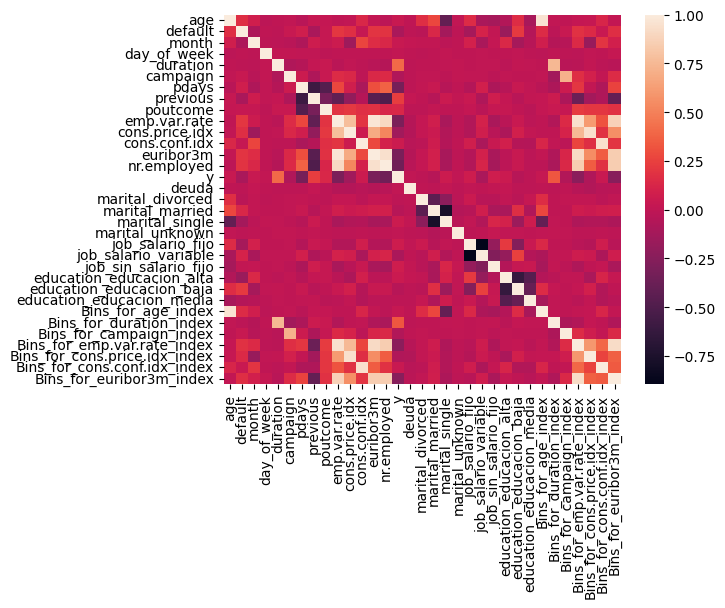

In [28]:
corr = train_set.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [29]:
from sklearn.model_selection import train_test_split,cross_val_score, KFold, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

#**III. Elección del mejor modelo**

In [30]:
#train_set = train_set.sample(frac=1, random_state=42).reset_index(drop=True)

#col_saved = train_set.columns

#scaler = StandardScaler()
#train_set_scaled = scaler.fit_transform(train_set.drop(labels=['y'], axis=1))

#train_set_scaled = pd.DataFrame(train_set_scaled)
#train_set_scaled.columns = col_saved[:-1]
#train_set_scaled

#x = train_set_scaled
x = train_set.drop(labels=['y'], axis=1)
y = train_set['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [31]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC()
}

In [32]:
k = 5
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

In [33]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

for name, model in models.items():
    scores = cross_val_score(model, x, y, cv=kf, scoring='accuracy')
    print(f"{name}: Accuracy promedio = {scores.mean():.4f} (+/- {scores.std():.4f})")

warnings.filterwarnings("default", category=UserWarning)

Decision Tree: Accuracy promedio = 0.8894 (+/- 0.0017)
Random Forest: Accuracy promedio = 0.9123 (+/- 0.0031)
Logistic Regression: Accuracy promedio = 0.9116 (+/- 0.0018)
SVM: Accuracy promedio = 0.8978 (+/- 0.0024)


#**IV. Modelo DecisionTreeClassifier**

In [34]:
tree_model = DecisionTreeClassifier(criterion='entropy',random_state=42)
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [35]:
tree_model.score(x_train, y_train) , tree_model.score(x_test, y_test)

(0.9999696509863429, 0.8885651857246905)

In [36]:
max_depth_range = list(range(1, 20))

accuracy = []
for depth in max_depth_range:

    clf = DecisionTreeClassifier(criterion='entropy', max_depth = depth,random_state=42)
    clf.fit(x_train, y_train)

    score_train  = clf.score(x_train, y_train)
    score_test  = clf.score(x_test, y_test)
    accuracy.append(score_test)

    print('depth=',depth, ' con score train=',score_train, ' y score test=',score_test)

depth= 1  con score train= 0.8873444613050075  y score test= 0.8873512988589464
depth= 2  con score train= 0.9023975720789075  y score test= 0.9068948773974266
depth= 3  con score train= 0.9073141122913505  y score test= 0.9129643117261471
depth= 4  con score train= 0.9126251896813353  y score test= 0.9156348628307842
depth= 5  con score train= 0.9146889226100152  y score test= 0.9166059723233795
depth= 6  con score train= 0.917784522003035  y score test= 0.9172129157562515
depth= 7  con score train= 0.9213657056145675  y score test= 0.9178198591891236
depth= 8  con score train= 0.9239757207890743  y score test= 0.9156348628307842
depth= 9  con score train= 0.9284066767830046  y score test= 0.9170915270696771
depth= 10  con score train= 0.9332321699544764  y score test= 0.9116290361738286
depth= 11  con score train= 0.9395144157814871  y score test= 0.910536537994659
depth= 12  con score train= 0.945402124430956  y score test= 0.9071376547705754
depth= 13  con score train= 0.9524127465

In [37]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, roc_curve, auc,classification_report,roc_auc_score,f1_score

In [38]:
best_depth = max_depth_range[np.argmax(accuracy)]
f'Mejor valor accuracy en la capa {best_depth}'

'Mejor valor accuracy en la capa 7'

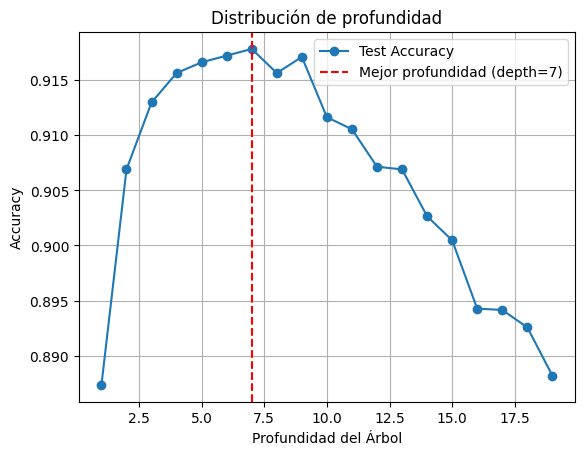

In [39]:
plt.plot(max_depth_range, accuracy, label='Test Accuracy', marker='o')
plt.axvline(x=best_depth, color='red', linestyle='--', label=f'Mejor profundidad (depth={best_depth})')
plt.xlabel('Profundidad del Árbol')
plt.ylabel('Accuracy')
plt.title('Distribución de profundidad')
plt.legend()
plt.grid()
plt.show()


In [40]:
final_tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth,random_state=42)
final_tree_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=42)

In [41]:
final_tree_model.score(x_train, y_train) , final_tree_model.score(x_test, y_test)

(0.9213657056145675, 0.9178198591891236)

In [42]:
import graphviz
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth = best_depth,random_state=42)
tree_clf.fit(x_train,y_train)
dot_data = tree.export_graphviz(tree_clf,feature_names = x.columns.tolist())
graph = graphviz.Source(dot_data)

graph

In [43]:
y_pred_first_model = tree_model.predict(x_test)
y_pred = final_tree_model.predict(x_test)

In [44]:
def validacion_modelo(model,x_train,y_train,y_test,y_pred):
  acc_tree = accuracy_score(y_test,y_pred)
  f1_tree = f1_score(y_test,y_pred)
  val_mean_f1_tree = cross_val_score(model,x_train,y_train,cv=5,scoring='f1_macro').mean()
  val_mean_acc_tree = cross_val_score(model,x_train,y_train,cv=5,scoring='accuracy').mean()
  test_mse= mean_squared_error(y_test,y_pred)


  print(f"accuracy score del modelo: {acc_tree:.4f} ({acc_tree * 100:.2f}%)")
  print(f"f1_score del modelo: {f1_tree:.4f} ({f1_tree * 100:.2f}%)")
  print(f"Promedio de validación cruzada f1 macro {val_mean_f1_tree} ({val_mean_f1_tree * 100:.2f}%)")
  print(f"Promedio de validación cruzada accuracy {val_mean_acc_tree} ({val_mean_acc_tree * 100:.2f}%)")
  print(f"Error de Prediccion en datos de Testeo MSE: {test_mse} ({test_mse * 100:.2f}%)")

In [45]:
def grafico_roc_auc(model,x_test,y_test):
  y_pred_proba = model.predict_proba(x_test)[::,1]

  fpr, tpr, th = roc_curve(y_test,  y_pred_proba)
  auc = roc_auc_score(y_test, y_pred_proba)
  plt.title("Curva ROC y AUC")
  plt.plot(fpr,tpr,label="AUC="+str(auc))
  plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
  plt.xlabel("FPR")
  plt.ylabel("TPR")
  plt.legend(loc=4)
  plt.show()

In [46]:
def matrix_confusion_grid(y_test,y_pred):
  print("Confusion Matrix")
  display(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

In [47]:
def matrix_confusion_graf(model,y_test,y_pred,best):
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot(cmap='Blues')
  plt.title(f"Matriz de Confusión (Arbol de Decisión - best_depth={best})")
  plt.show()

In [48]:
validacion_modelo(final_tree_model,x_train,y_train,y_test,y_pred)

accuracy score del modelo: 0.9178 (91.78%)
f1_score del modelo: 0.5914 (59.14%)
Promedio de validación cruzada f1 macro 0.7612662066266102 (76.13%)
Promedio de validación cruzada accuracy 0.9104704097116845 (91.05%)
Error de Prediccion en datos de Testeo MSE: 0.08218014081087642 (8.22%)


In [49]:
grafico_roc_auc(final_tree_model,x_test,y_test)

In [50]:
matrix_confusion_grid(y_test,y_pred)

Confusion Matrix


Predicted     0    1   All
True                      
0          7071  239  7310
1           438  490   928
All        7509  729  8238

In [51]:
matrix_confusion_graf(final_tree_model,y_test,y_pred,best_depth)

#**V. Probando con otro Dataset el Modelo DecisionTreeClassifier**

In [52]:
# Tratamiento de Datos Prueba (otro data set con datos diferentes)
normalize_month(test_set)
normalize_days(test_set)
group_education(test_set)
group_job(test_set)
agrupar_deuda(test_set)
test_set = convertir_categoricas_numericas(test_set,cols_convertir)
test_set = label_enconding(test_set)

for column, bins_list in bins_dict.items():
  create_bins(test_set, column, bins_list)

Bins for age creados
Bins for duration creados
Bins for campaign creados
Bins for emp.var.rate creados
Bins for cons.price.idx creados
Bins for cons.conf.idx creados
Bins for euribor3m creados


In [53]:
# Datos de prueba
test_x = test_set.drop(labels=['y'], axis=1)
test_y = test_set['y']

In [54]:
# prediccion de los datos de prueba
y_pred_test = final_tree_model.predict(test_x)

In [55]:
# Validación de la predicción de los datos de prueba
validacion_modelo(final_tree_model,x_train,y_train,test_y,y_pred_test)

accuracy score del modelo: 0.9206 (92.06%)
f1_score del modelo: 0.5948 (59.48%)
Promedio de validación cruzada f1 macro 0.7612662066266102 (76.13%)
Promedio de validación cruzada accuracy 0.9104704097116845 (91.05%)
Error de Prediccion en datos de Testeo MSE: 0.07938820101966497 (7.94%)


In [56]:
# gráfico de la curva roc de los datos de prueba
grafico_roc_auc(final_tree_model,test_x,test_y)

In [57]:
# matriz confusion de los datos de prueba, con los valores reales de los datos de prueba
matrix_confusion_grid(test_y,y_pred_test)

Confusion Matrix


Predicted     0    1   All
True                      
0          3552  116  3668
1           211  240   451
All        3763  356  4119

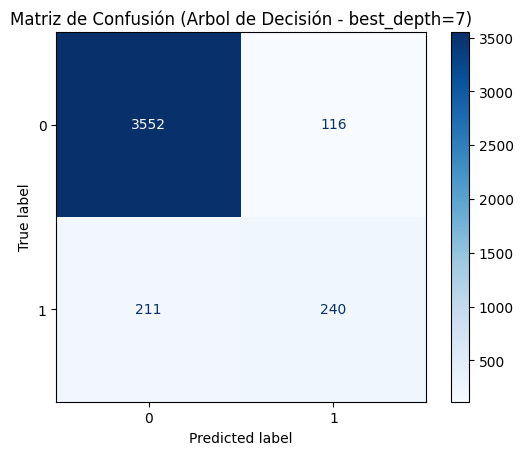

In [58]:
# matriz confusion de los datos de prueba, con los valores reales de los datos de prueba
matrix_confusion_graf(final_tree_model,test_y,y_pred_test,best_depth)

#**V. Modelo RandomForestClassifier**

In [59]:
modelRandom = RandomForestClassifier(criterion='entropy', random_state=42)
modelRandom.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [60]:
modelRandom.score(x_train, y_train) , modelRandom.score(x_test, y_test)

(0.9999696509863429, 0.9183054139354212)

In [61]:
train_accuracy = []
test_accuracy = []

for depth in max_depth_range:
    rf = RandomForestClassifier(criterion='entropy', max_depth=depth, random_state=42)
    rf.fit(x_train, y_train)

    train_acc = rf.score(x_train, y_train)
    test_acc = rf.score(x_test, y_test)

    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)

    print(f'depth={depth}: Train Accuracy={train_acc:.4f}, Test Accuracy={test_acc:.4f}')

depth=1: Train Accuracy=0.8873, Test Accuracy=0.8874
depth=2: Train Accuracy=0.8895, Test Accuracy=0.8901
depth=3: Train Accuracy=0.9017, Test Accuracy=0.9023
depth=4: Train Accuracy=0.9048, Test Accuracy=0.9068
depth=5: Train Accuracy=0.9069, Test Accuracy=0.9074
depth=6: Train Accuracy=0.9091, Test Accuracy=0.9087
depth=7: Train Accuracy=0.9137, Test Accuracy=0.9101
depth=8: Train Accuracy=0.9182, Test Accuracy=0.9128
depth=9: Train Accuracy=0.9248, Test Accuracy=0.9143
depth=10: Train Accuracy=0.9329, Test Accuracy=0.9175
depth=11: Train Accuracy=0.9427, Test Accuracy=0.9168
depth=12: Train Accuracy=0.9547, Test Accuracy=0.9187
depth=13: Train Accuracy=0.9641, Test Accuracy=0.9188
depth=14: Train Accuracy=0.9725, Test Accuracy=0.9185
depth=15: Train Accuracy=0.9807, Test Accuracy=0.9175
depth=16: Train Accuracy=0.9873, Test Accuracy=0.9190
depth=17: Train Accuracy=0.9923, Test Accuracy=0.9190
depth=18: Train Accuracy=0.9955, Test Accuracy=0.9200
depth=19: Train Accuracy=0.9980, Test

In [62]:
best_depth_random = max_depth_range[np.argmax(test_accuracy)]
f'Mejor valor accuracy en la capa {best_depth_random}'

'Mejor valor accuracy en la capa 18'

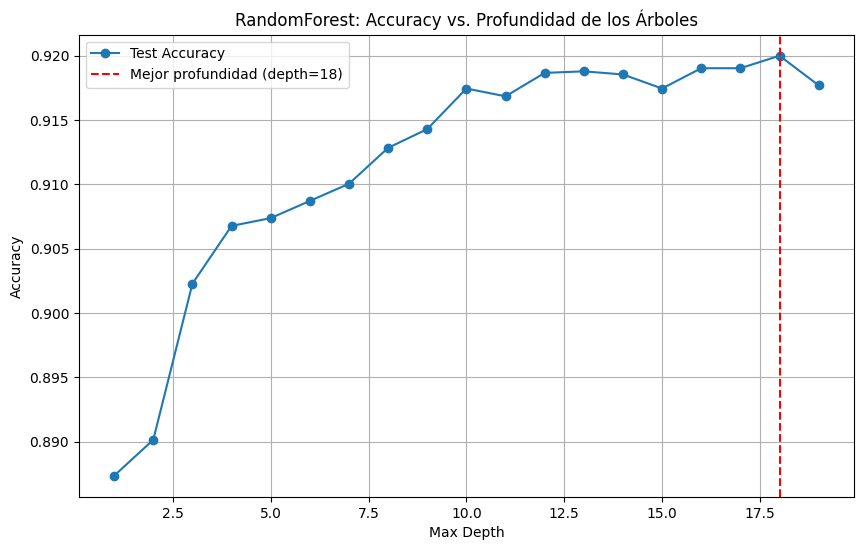

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, test_accuracy, label='Test Accuracy', marker='o')
plt.axvline(x=best_depth_random, color='red', linestyle='--', label=f'Mejor profundidad (depth={best_depth_random})')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('RandomForest: Accuracy vs. Profundidad de los Árboles')
plt.legend()
plt.grid()
plt.show()

In [64]:
final_random_model = RandomForestClassifier(criterion='entropy', max_depth=best_depth_random, random_state=42)
final_random_model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=18, random_state=42)

In [65]:
final_random_model.score(x_train, y_train) , final_random_model.score(x_test, y_test)

(0.9955083459787557, 0.920004855547463)

In [66]:
tree_index = 0
single_tree = final_random_model.estimators_[tree_index]

dot_data = tree.export_graphviz(single_tree,
                                feature_names=x_train.columns.tolist(),
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph

In [67]:
y_pred_random = final_random_model.predict(x_test)

In [68]:
validacion_modelo(final_random_model,x_train,y_train,y_test,y_pred_random)

accuracy score del modelo: 0.9200 (92.00%)
f1_score del modelo: 0.5945 (59.45%)
Promedio de validación cruzada f1 macro 0.7516557296873394 (75.17%)
Promedio de validación cruzada accuracy 0.9109863429438543 (91.10%)
Error de Prediccion en datos de Testeo MSE: 0.07999514445253703 (8.00%)


In [69]:
grafico_roc_auc(final_random_model,x_test,y_test)

In [70]:
matrix_confusion_grid(y_test,y_pred_random)

Confusion Matrix


Predicted     0    1   All
True                      
0          7096  214  7310
1           445  483   928
All        7541  697  8238

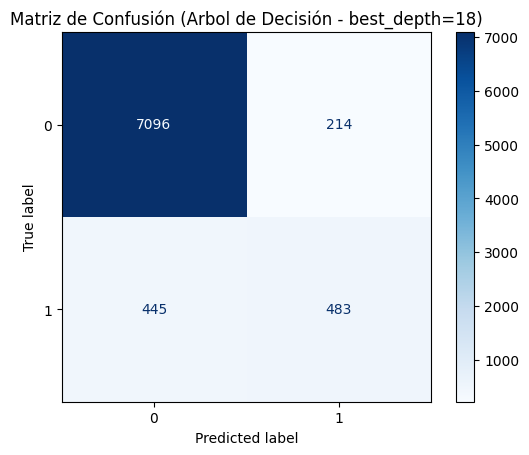

In [71]:
matrix_confusion_graf(final_random_model,y_test,y_pred_random,best_depth_random)

#**V. Probando con otro Dataset el Modelo RandomForestClassifier**

In [72]:
y_pred_random_test = final_random_model.predict(test_x)

In [73]:
validacion_modelo(final_random_model,x_train,y_train,test_y,y_pred_random_test)

accuracy score del modelo: 0.9786 (97.86%)
f1_score del modelo: 0.8977 (89.77%)
Promedio de validación cruzada f1 macro 0.7516557296873394 (75.17%)
Promedio de validación cruzada accuracy 0.9109863429438543 (91.10%)
Error de Prediccion en datos de Testeo MSE: 0.021364408837096383 (2.14%)


In [74]:
grafico_roc_auc(final_random_model,test_x,test_y)

In [75]:
matrix_confusion_grid(test_y,y_pred_random_test)

Confusion Matrix


Predicted     0    1   All
True                      
0          3645   23  3668
1            65  386   451
All        3710  409  4119

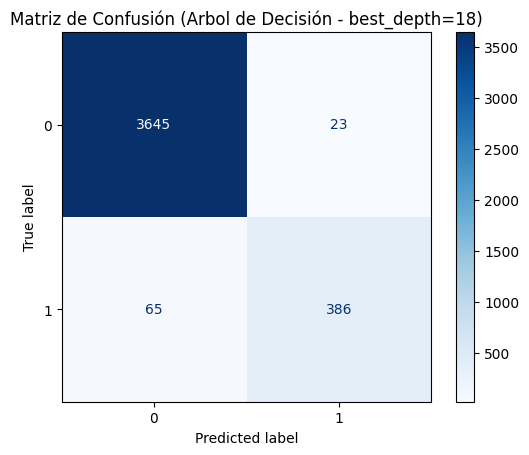

In [76]:
matrix_confusion_graf(final_random_model,test_y,y_pred_random_test,best_depth_random)

In [77]:
import pickle
pickle.dump(final_random_model,open("ModeloRandomForestBank.md","wb"))